In [1]:
from PIL import Image
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import cv2

In [2]:
black_mask_path = r"D:/deepfakes/mask_xray_real/black_mask.png"

In [3]:
x_ray_real = Image.open(black_mask_path)

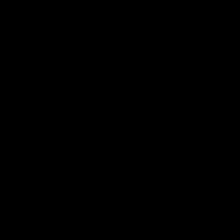

In [4]:
x_ray_real

In [5]:
path_fake_image_example = r"D:\deepfakes\training_fake_faces\owxbbpjpch\owxbbpjpch_0.png"

In [6]:
fake_image_example = Image.open(path_fake_image_example)

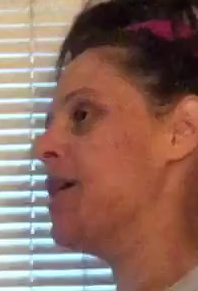

In [7]:
fake_image_example

In [8]:
fake_image_example = np.asarray(fake_image_example)

In [9]:
import face_alignment

In [10]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

In [11]:
preds = fa.get_landmarks(fake_image_example)

In [12]:
points = preds[0]

In [13]:
hull = ConvexHull(points)

In [14]:
x = points[:,0]
y = points[:,1]

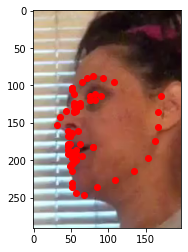

In [15]:
import matplotlib.pyplot as plt
im = plt.imread(path_fake_image_example)
implot = plt.imshow(im)

# # put a red dot, size 40, at 2 locations:
plt.scatter(x=x, y=y, c='r')

plt.show()

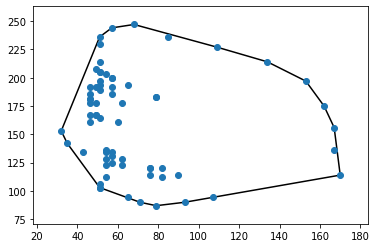

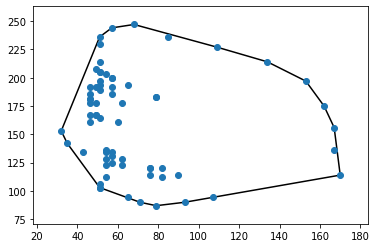

In [16]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(points)
convex_hull_plot_2d(hull)

In [17]:
img = cv2.drawContours(fake_image_example, [points[hull.vertices].astype(int)], -1, (255,255,255), thickness=cv2.FILLED)

In [18]:
cv2.imwrite(r"D:/deepfakes/x_ray_example_on_one_picture/convex_hull.png",cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

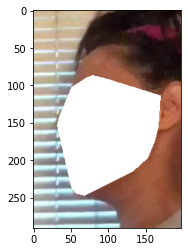

In [18]:
plt.imshow(img)

### Create mask with black frame

In [40]:
def mask_creator():
    img = Image.open(path_fake_image_example)
    img = np.asarray(img)
    height, width, _ = img.shape
    black_mask = np.zeros((height, width))
    preds = fa.get_landmarks(img)
    if len(preds) < 1:
        return
    points = preds[0]
    hull = ConvexHull(points)
    img = cv2.drawContours(black_mask, [points[hull.vertices].astype(int)], -1, (1,1,1), thickness=cv2.FILLED)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = 4.0 * np.multiply(img, (1.0 - img))
    img = (img*255).astype(np.uint8)
    _, thresh1 = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh1, cmap='gray')
#     cv2.imwrite(r"D:/deepfakes/x_ray_example_on_one_picture/convex_hull_black_frame_correct.png", img)

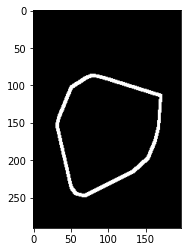

In [41]:
mask_creator()

In [22]:
x1 = np.arange(9.0).reshape((3, 3))

In [23]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [24]:
1.0 - x1 

array([[ 1.,  0., -1.],
       [-2., -3., -4.],
       [-5., -6., -7.]])

In [25]:
np.multiply(x1, (1.0 - x1))

array([[  0.,   0.,  -2.],
       [ -6., -12., -20.],
       [-30., -42., -56.]])

### Try reading the same image

(198, 157)
239
0


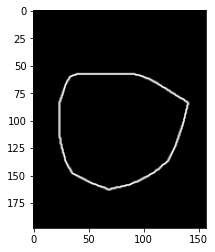

In [21]:
mask_gray = cv2.imread(r"D:/deepfakes/mask_xray_fake/ikebomnsiq/ikebomnsiq_100.png", cv2.IMREAD_GRAYSCALE)
print(mask_gray.shape)
print(np.amax(mask_gray))
print(np.amin(mask_gray))
plt.imshow(mask_gray, cmap="gray")

In [27]:
_,thresh1 = cv2.threshold(mask_gray, 1, 255, cv2.THRESH_BINARY)

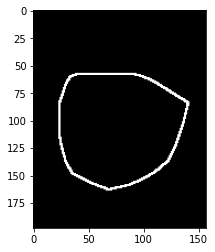

In [28]:
plt.imshow(thresh1, cmap="gray")

In [31]:
(unique, counts) = np.unique(thresh1, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 30198]
 [  255   888]]


In [39]:
(unique, counts) = np.unique(mask_gray, return_counts=True)

In [40]:
frequencies = np.asarray((unique, counts)).T

In [41]:
print(frequencies)

[[    0 30198]
 [   59   220]
 [  155   180]
 [  191   268]
 [  219    40]
 [  239   180]]


In [45]:
normalized = (mask_gray - np.min(mask_gray))/np.ptp(mask_gray)

In [46]:
print(np.amax(normalized))

1.0


In [47]:
print(np.amin(normalized))

0.0


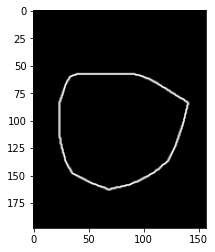

In [48]:
plt.imshow(normalized, cmap="gray")

In [54]:
(unique, counts) = np.unique(normalized, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[0.00000000e+00 3.01980000e+04]
 [2.46861925e-01 2.20000000e+02]
 [6.48535565e-01 1.80000000e+02]
 [7.99163180e-01 2.68000000e+02]
 [9.16317992e-01 4.00000000e+01]
 [1.00000000e+00 1.80000000e+02]]
